In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data for ICTE Final Calculation
final_data = "drive/My Drive/Study/ICTE/ICTE_Final_calculation.xlsx"

df_final_data = pd.read_excel(final_data)

# Set max_rows and max_columns options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
display(df_final_data)

,Framework,CPU,Monitor,Disk,Base,Total Hardware Energy,Application Energy,Total Time,Energy Consumed Total(W),Energy Consumed in(J/S)
0,Express,0.834,6.571,0.0000,14.081,21.487,0.051,24.5,527.6810,21.538
1,Fastify,0.895,6.598,0.0020,14.139,21.636,0.033,24.4,528.7236,21.669
2,Nest,0.922,6.598,0.0000,14.139,21.659,0.038,24.4,529.4068,21.697
3,Connect,0.880,6.544,0.0004,14.024,21.449,0.061,24.6,529.1460,21.510


In [5]:
#Descritive Analsis of the data
df_final_data.describe()

,CPU,Monitor,Disk,Base,Total Hardware Energy,Application Energy,Total Time,Energy Consumed Total(W),Energy Consumed in(J/S)
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000
mean,0.882750,6.577750,0.000600,14.095750,21.557750,0.045750,24.475000,528.73935,21.603500
std,0.036854,0.025851,0.000952,0.055096,0.105209,0.012685,0.095743,0.75965,0.093211
min,0.834000,6.544000,0.000000,14.024000,21.449000,0.033000,24.400000,527.68100,21.510000
25%,0.868500,6.564250,0.000000,14.066750,21.477500,0.036750,24.400000,528.46295,21.531000
50%,0.887500,6.584500,0.000200,14.110000,21.561500,0.044500,24.450000,528.93480,21.603500
75%,0.901750,6.598000,0.000800,14.139000,21.641750,0.053500,24.525000,529.21120,21.676000
max,0.922000,6.598000,0.002000,14.139000,21.659000,0.061000,24.600000,529.40680,21.697000


In [23]:
# T test between Total Hardware Energy and Energy Consumed(W)
from scipy import stats

column1 = 'Total Hardware Energy'
column2 = 'Energy Consumed in(J/S)'
df_final_data_tTest = df_final_data[[column1,column2]]

dataset_column_1 = df_final_data_tTest[column1]
dataset_column_2 = df_final_data_tTest[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))
print("-----------------------------------------------------------")
print("T test between Total Hardware Energy and Avg Energy Consumed(W)")
print("-----------------------------------------------------------")

print("The variance ratio is: ", ratio)
alpha = 0.01

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


-----------------------------------------------------------
T test between Total Hardware Energy and Avg Energy Consumed(W)
-----------------------------------------------------------
The variance ratio is:  1.2739976980625165
p value:  0.5391838599236958
t value:  -0.6509653112609995
Null Hypothesis Is Accepted


In [25]:
from scipy.stats import f_oneway

# Extract the column you want to perform the ANOVA test on
data = df_final_data['Energy Consumed Total(W)']

# Perform the one-tailed ANOVA test
f_value, p_value = f_oneway(data[data < data.mean()], data[data >= data.mean()])
print("-------------------------------------------------------")
print("Anova Test of Energy consumed totally by the frameworks")
print("-------------------------------------------------------")
# Print the results
print("F-value:", f_value)
print("P-value:", p_value)

alpha = 0.01
# Check if p-value is less than significance level
if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


-------------------------------------------------------
Anova Test of Energy consumed totally by the frameworks
-------------------------------------------------------
F-value: 3.995357390283667
P-value: 0.18366150147279456
Fail to reject null hypothesis


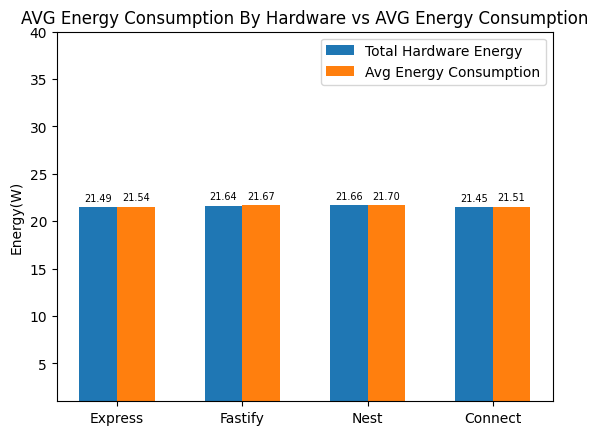

In [26]:
#Plot AVG Energy Consumption By Hardware vs AVG Energy Consumption
import matplotlib.pyplot as plt
import numpy as np

# Data for the bars
member1 = df_final_data['Total Hardware Energy']
member2 = df_final_data['Energy Consumed in(J/S)']

# The x locations for the groups
x = np.arange(len(member1))

# Width of the bars
width = 0.3
# Plotting the bars
fig, ax = plt.subplots()
plt.ylim(1, 40)
rects1 = ax.bar(x - width/2, member1, width, label='Total Hardware Energy')
rects2 = ax.bar(x + width/2, member2, width, label='Avg Energy Consumption')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy(W)')
ax.set_title('AVG Energy Consumption By Hardware vs AVG Energy Consumption')
ax.set_xticks(x)
ax.set_xticklabels(['Express', 'Fastify', 'Nest', 'Connect'])
ax.legend()

# Function to add the value labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                fontsize=7)

# # Adding value labels on top of the bars
autolabel(rects1)
autolabel(rects2)

# Displaying the plot

plt.show()


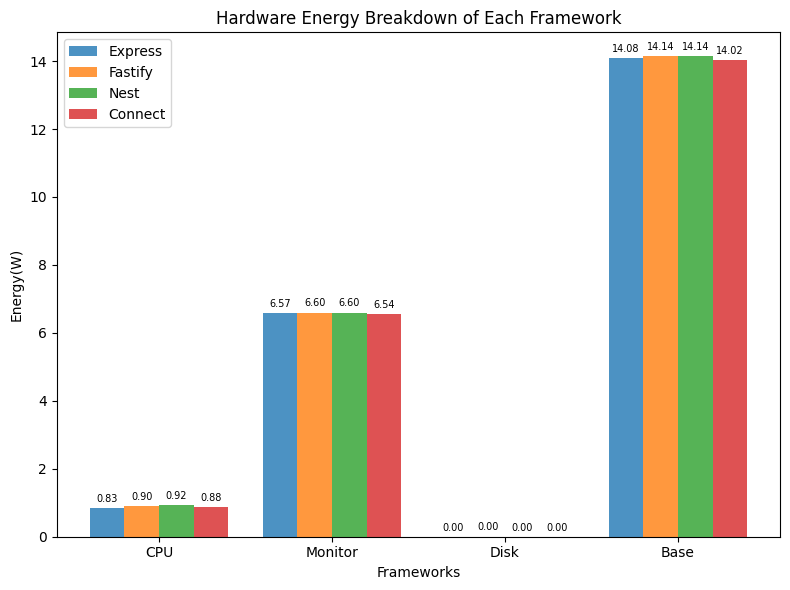

In [27]:
#Plot Hardware Energy Breakdown of Each Framework
import matplotlib.pyplot as plt
import numpy as np

# Sample data
group_names = ['CPU', 'Monitor', 'Disk', 'Base']
data = np.array([df_final_data['CPU'], 
                 df_final_data['Monitor'], 
                 df_final_data['Disk'], 
                 df_final_data['Base']])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
opacity = 0.8


# Plot the bars
for i in range(data.shape[1]):
    x_pos = np.arange(data.shape[0]) + (i * bar_width)
    rects = ax.bar(x_pos, data[:, i], bar_width, alpha=opacity, label=df_final_data['Framework'][i])

    # Attach labels to the bars
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=7)

# Set the axis labels and title
ax.set_xlabel('Frameworks')
ax.set_ylabel('Energy(W)')
ax.set_title('Hardware Energy Breakdown of Each Framework')

# Set the x-axis tick labels
ax.set_xticks(np.arange(data.shape[0]) + ((data.shape[1]-1)/2) * bar_width)
ax.set_xticklabels(group_names)

# Add the legend
ax.legend()

plt.tight_layout()
plt.show()


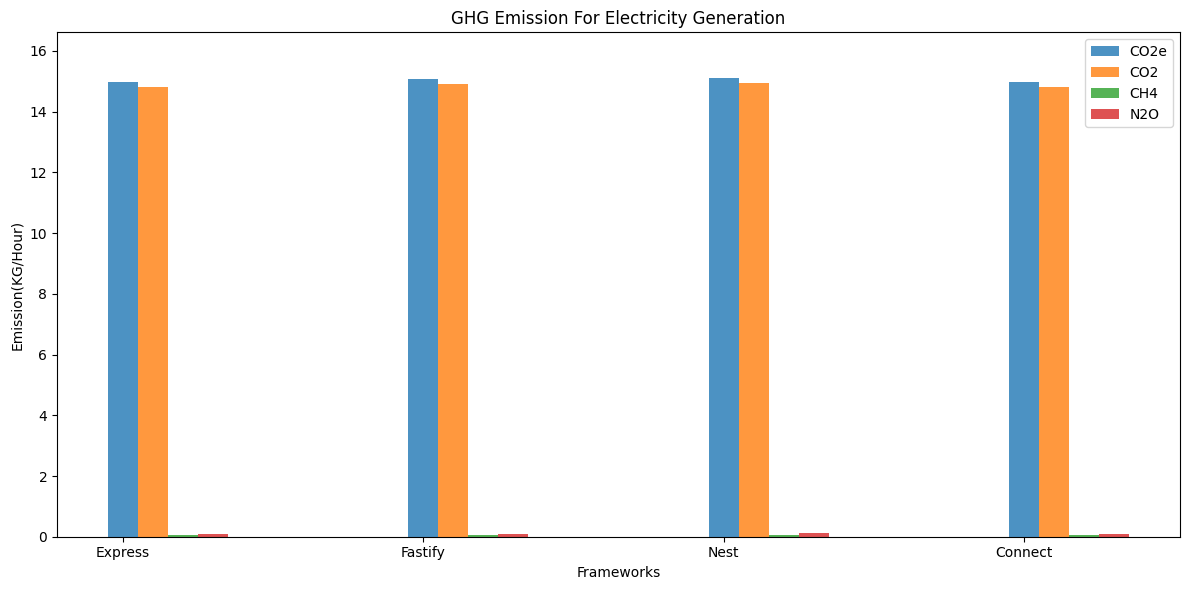

In [28]:
# Plot GHG Emission For Electricity Generation
import numpy as np
import matplotlib.pyplot as plt

# Datas are taken from manually from the excel sheet as the amount is not large
group_names = ['Express', 'Fastify', 'Nest', 'Connect']
data = np.array([[14.994 , 14.825,0.062 , 0.106], 
                 [15.085 , 14.915 ,0.062, 0.106 ], 
                 [15.104,14.935 , 0.062 , 0.107 ], 
                 [14.974 , 14.806, 0.061, 0.106 ]])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the x-axis ticks and tick labels
x_pos = np.arange(len(group_names))
ax.set_xticks(x_pos)
ax.set_xticklabels(group_names)

# Set the y-axis range
ax.set_ylim([0, max(data.flatten())*1.1])

# Create a bar chart for each group
bar_width = 0.1
opacity = 0.8
colors = ['r', 'g', 'b', 'y']
label_columns=['CO2e','CO2','CH4','N2O']

# Plot the bars
for i in range(data.shape[1]):
    x_pos = np.arange(data.shape[0]) + (i * bar_width)
    rects = ax.bar(x_pos, data[:, i], bar_width, alpha=opacity, label=label_columns[i])


# Add axis labels and a title
ax.set_xlabel('Frameworks')
ax.set_ylabel('Emission(KG/Hour)')
ax.set_title('GHG Emission For Electricity Generation')

ax.legend(loc='upper right')


# ax.legend()
plt.tight_layout()
# Show the plot
plt.show()

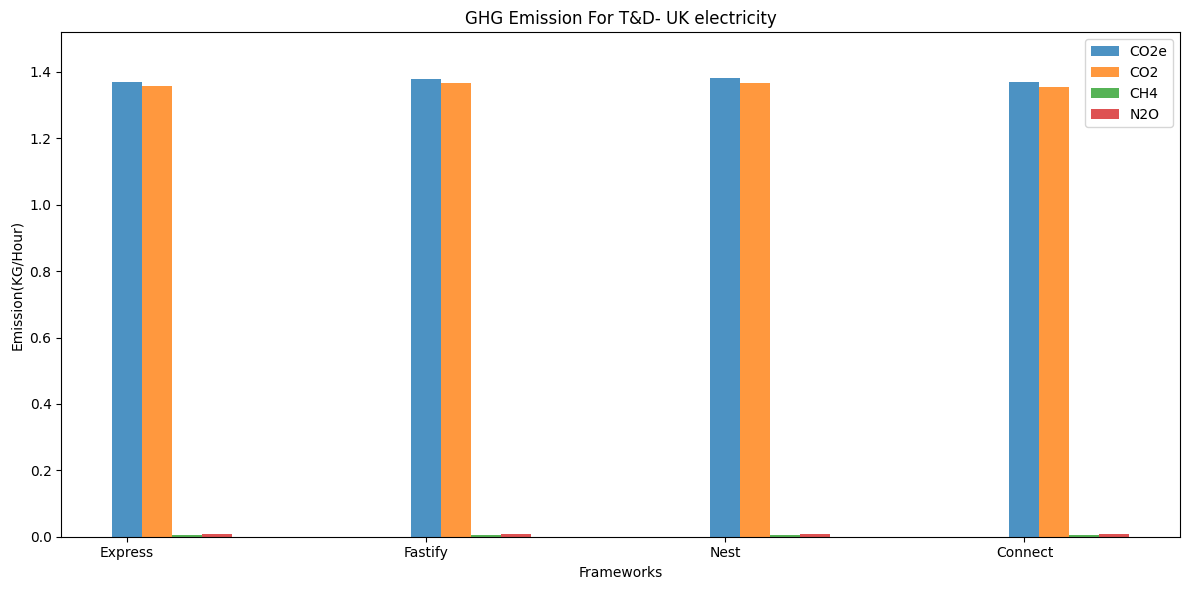

In [30]:
# GHG Emission For T&D- UK electricity
import numpy as np
import matplotlib.pyplot as plt

# Datas are taken from manually from the excel sheet as the amount is not large
group_names = ['Express', 'Fastify', 'Nest', 'Connect']
data = np.array([[1.371,  1.356  ,0.005 , 0.009 ], 
                 [1.379 , 1.365, 0.005 , 0.009], 
                 [1.381,1.366 , 0.005 ,0.009 ], 
                 [1.369 , 1.355  ,0.005, 0.009]])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the x-axis ticks and tick labels
x_pos = np.arange(len(group_names))
ax.set_xticks(x_pos)
ax.set_xticklabels(group_names)

# Set the y-axis range
ax.set_ylim([0, max(data.flatten())*1.1])

# Create a bar chart for each group
bar_width = 0.1
opacity = 0.8
colors = ['r', 'g', 'b', 'y']
label_columns=['CO2e','CO2','CH4','N2O']

# Plot the bars
for i in range(data.shape[1]):
    x_pos = np.arange(data.shape[0]) + (i * bar_width)
    rects = ax.bar(x_pos, data[:, i], bar_width, alpha=opacity, label=label_columns[i])

# Add axis labels and a title
ax.set_xlabel('Frameworks')
ax.set_ylabel('Emission(KG/Hour)')
ax.set_title('GHG Emission For T&D- UK electricity')

ax.legend(loc='upper right')


# ax.legend()
plt.tight_layout()
# Show the plot
plt.show()

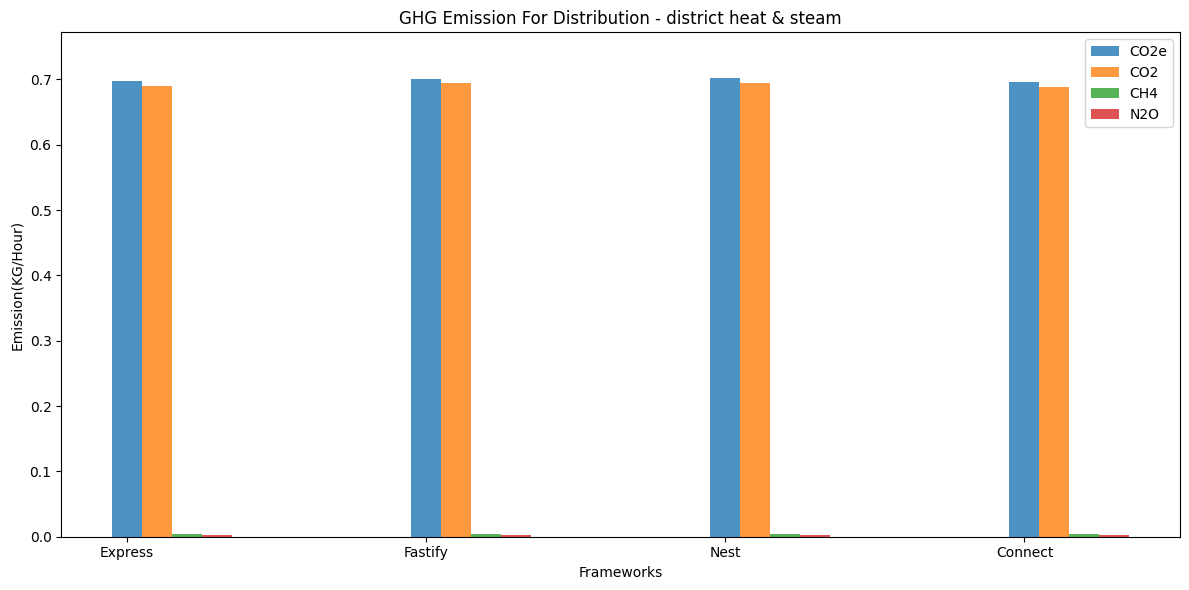

In [31]:
# Graph GHG Emission For Distribution - district heat & steam

import numpy as np
import matplotlib.pyplot as plt

# Datas are taken from manually from the excel sheet as the amount is not large
group_names = ['Express', 'Fastify', 'Nest', 'Connect']
data = np.array([[0.697,0.690 ,0.004, 0.002], 
                 [0.701,0.694, 0.004 ,0.002], 
                 [0.702,0.695 ,0.004, 0.002], 
                 [0.696 ,0.689, 0.004, 0.002]])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the x-axis ticks and tick labels
x_pos = np.arange(len(group_names))
ax.set_xticks(x_pos)
ax.set_xticklabels(group_names)

# Set the y-axis range
ax.set_ylim([0, max(data.flatten())*1.1])

# Create a bar chart for each group
bar_width = 0.1
opacity = 0.8
colors = ['r', 'g', 'b', 'y']
label_columns=['CO2e','CO2','CH4','N2O']

# Plot the bars
for i in range(data.shape[1]):
    x_pos = np.arange(data.shape[0]) + (i * bar_width)
    rects = ax.bar(x_pos, data[:, i], bar_width, alpha=opacity, label=label_columns[i])

# Add axis labels and a title
ax.set_xlabel('Frameworks')
ax.set_ylabel('Emission(KG/Hour)')
ax.set_title('GHG Emission For Distribution - district heat & steam')

ax.legend(loc='upper right')


# ax.legend()
plt.tight_layout()
# Show the plot
plt.show()